# Basic Data Manipulation with Pandas

Following are the common 4 steps to start a data analysis project. 

* Data Exploration
* Data Filtering and Sorting
* Data Cleaning
* Data Transformation

Data Files Used:
* class1_test1.tsv
* class1_test2.tsv
* class2_test1.tsv
* class1_test1_cleaning.tsv

Import `numpy` and `pandas`.

In [1]:
import pandas as pd
import numpy as np

## 1. Data Exploration

The loaded data may be too large to examine all of them. We check out following aspects of the data to understand it better.
* Number of rows and records
* Data types of columns
* View data samples 
* Basic statistics of each columns
* Basic plotting

### Load CSV File

Load csv file `class1_test1.tsv` in `data` folder.

In [2]:
df1 = pd.read_csv('data/class1_test1.tsv', delimiter= '\t')
df1

,name,english,maths,science
0,Aaron,70,46,47
1,Adrian,72,40,95
2,Alby,49,65,64
3,Abner,86,40,96
4,Benett,50,98,69
5,Brion,81,92,95
6,Collin,45,83,45
7,Cyril,60,46,74
8,Dylan,72,90,74


#### Size of Data

The `dataframe.shape` attribute returns dimensions of the data.

In [3]:
df1.shape

(9, 4)

#### Sample Data

The `head()` and `tail()` function returns first and last few rows of the data. You can specify number of sample to be displayed. 

In [4]:
df1.head()
df1.tail(3)

,name,english,maths,science
6,Collin,45,83,45
7,Cyril,60,46,74
8,Dylan,72,90,74


#### Columns and Index

Dataframe is like a table with header. The `columns` attribute gives its column names. 

In [5]:
df1.columns

Index(['name', 'english', 'maths', 'science'], dtype='object')

Each row in a dataframe has an index too, which can be used to fetch that row.
* Index does NOT need to be unique.

In [6]:
list(df1.index)

[0, 1, 2, 3, 4, 5, 6, 7, 8]

#### Dataframe Info and Statistics 

The `dataframe.info()` function is used to get a summary of the dataframe.
* Each column's name, data type and record counts, thus it contains any null data.
* Index type
* Memory usage

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   name     9 non-null      object
 1   english  9 non-null      int64 
 2   maths    9 non-null      int64 
 3   science  9 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 416.0+ bytes


### Load Another CSV File (Exercise)

Load another csv file `data/class2_test1.tsv`.

In [8]:
df2 = pd.read_csv('data/class2_test1.tsv', delimiter='\t')
df2

,name,english,maths,science
0,Eliphaz,70,46,47
1,Eliot,72,40,95
2,Eric,49,65,64
3,Ethan,86,40,96
4,Felix,50,98,69
5,Feivel,81,92,95
6,Fergus,45,83,45
7,Filbert,60,46,74
8,Gerard,72,90,74


Examine the dataframe using `shape`, `head()`, `tail()`, `info()` and `describe()`.

In [9]:
df2.shape
# df2.head()
# df2.tail()
# df2.info()
# df2.describe()

(9, 4)

### Concatenate Dataframes

Before we concatenate 2 dataframes together, add a column `class` to `df1` with value `class1`.

In [10]:
df1['class'] = 'class1'
df1.head()

,name,english,maths,science,class
0,Aaron,70,46,47,class1
1,Adrian,72,40,95,class1
2,Alby,49,65,64,class1
3,Abner,86,40,96,class1
4,Benett,50,98,69,class1


Add a column `class` to `df2` with value `class2`.

In [11]:
df2['class'] = 'class2'
df2.head()

,name,english,maths,science,class
0,Eliphaz,70,46,47,class2
1,Eliot,72,40,95,class2
2,Eric,49,65,64,class2
3,Ethan,86,40,96,class2
4,Felix,50,98,69,class2


Concatenate the 2 datframes together to get new dataframe.

In [12]:
df = pd.concat([df1, df2])

Use `shape` to confirm that 2 dataframes are concatenated together.

In [13]:
df.shape

(18, 5)

The original index values remain the same. 

In [14]:
df.columns
df.index

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8], dtype='int64')

Selection of an index using `loc[]` may return multiple rows.

In [15]:
df.loc[1, :]

,name,english,maths,science,class
1,Adrian,72,40,95,class1
1,Eliot,72,40,95,class2


#### Reset Index

After merging, the index value of original dataframe remains.

In [16]:
df.reset_index(inplace = True)
list(df.index)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

Selection by row index returns only 1 row after resetting index.

In [17]:
df.loc[1, :]

index           1
name       Adrian
english        72
maths          40
science        95
class      class1
Name: 1, dtype: object

After resetting index, the original index column is added to the dataframe as a column.

In [18]:
print(df.columns)
df.head()

Index(['index', 'name', 'english', 'maths', 'science', 'class'], dtype='object')


,index,name,english,maths,science,class
0,0,Aaron,70,46,47,class1
1,1,Adrian,72,40,95,class1
2,2,Alby,49,65,64,class1
3,3,Abner,86,40,96,class1
4,4,Benett,50,98,69,class1


Drop a column from dataframe in place, which update the dataframe directly.

In [19]:
if 'index' in df.columns:
    df.drop(columns='index',inplace=True)
df.head()

,name,english,maths,science,class
0,Aaron,70,46,47,class1
1,Adrian,72,40,95,class1
2,Alby,49,65,64,class1
3,Abner,86,40,96,class1
4,Benett,50,98,69,class1


#### Change Index Column

In [20]:
df3 = df.set_index('name')
df3.head()

,english,maths,science,class
name,,,,
Aaron,70,46,47,class1
Adrian,72,40,95,class1
Alby,49,65,64,class1
Abner,86,40,96,class1
Benett,50,98,69,class1


Select rows by new index.

In [21]:
df3.loc[['Eric','Felix'], :]

,english,maths,science,class
name,,,,
Eric,49,65,64,class2
Felix,50,98,69,class2


### Basic Plotting

Summarized steps to create the `df3` dataframe. 

In [22]:
import pandas as pd
import numpy as np
df1 = pd.read_csv('data/class1_test1.tsv', delimiter='\t')
df2 = pd.read_csv('data/class2_test1.tsv', delimiter='\t')
df3 = pd.concat([df1,df2])
df3.set_index('name', inplace=True)
df3.head()

,english,maths,science
name,,,
Aaron,70,46,47
Adrian,72,40,95
Alby,49,65,64
Abner,86,40,96
Benett,50,98,69


#### Histogram

Histogram represents the frequency of occurrence within fixed intervals of values.

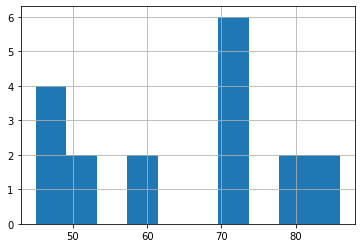

In [23]:
df3.loc[:, 'english'].hist()

The parameter `bins` can be used to control the granularity of the charts.

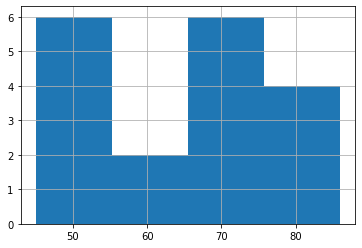

In [24]:
df3.loc[:, 'english'].hist(bins=4)

The parameter `bins` can also be boundary value of bins.

[40, 50, 60, 70, 80, 90, 100]


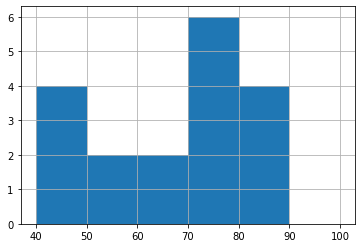

In [25]:
s = list(range(40,101,10))
print(s)
df3.loc[:, 'english'].hist(bins = s)

## 2. Updating and Sorting

* Selecting row(s) and column(s) using index operator, `loc[]` and `iloc[]`
* Boolean filtering
* Assigning values with indexing
* Sorting

### Indexing and Data Selection

**Indexing** means selecting particular rows and columns of data from a DataFrame. 
* Indexing can be used to select individual row, column or item. 
* Indexing can also be used to perform **Subset Selection**.

Pandas uses indexers `[ ]`, `.loc[]` and `.iloc[ ]`.
* `Dataframe[]`: Used for columns selection. Also known as indexing operator.
* `Dataframe.loc[]`: Used for rows selection using **labels**.
* `Dataframe.iloc[]` : Used for rows selection using **positions**.

### Updating Values

Selection in dataframe returns a **view** to the original data. Thus any changes to values in the view will affects original data directly. 

In [26]:
df3['eng_pass'] = 'failed'
filtered = (df3['english']>=50)
df3['eng_pass'][ filtered ] = 'pass'

<ipython-input-26-f4b950213ba9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['eng_pass'][ filtered ] = 'pass'


In [27]:
df3.head()

,english,maths,science,eng_pass
name,,,,
Aaron,70,46,47,pass
Adrian,72,40,95,pass
Alby,49,65,64,failed
Abner,86,40,96,pass
Benett,50,98,69,pass


#### Option 2
Create new column `maths_pass` using `apply()` function.

In [28]:
df3['maths_pass'] = df3['maths'].apply(lambda x: 'pass' if x >=50 else 'failed')
df3.head()

,english,maths,science,eng_pass,maths_pass
name,,,,,
Aaron,70,46,47,pass,failed
Adrian,72,40,95,pass,failed
Alby,49,65,64,failed,pass
Abner,86,40,96,pass,failed
Benett,50,98,69,pass,pass


### Exercise: Assign Grades to Students

We would like to assign grades to students' English subject based on their marks.
* Create a Maths Grade Columns 'maths_grade' 
* Maths >= 80  A
* Maths >= 70  B
* Maths >= 60  C
* Else    D

In [29]:
def marks_to_grade(mark):
    if mark >=80: return 'A'
    elif mark >= 70: return 'B'
    elif mark >= 60: return 'C'
    else: return 'D'

In [30]:
df3['maths_grade'] = df3['maths'].apply(marks_to_grade)
df3.head()

,english,maths,science,eng_pass,maths_pass,maths_grade
name,,,,,,
Aaron,70,46,47,pass,failed,D
Adrian,72,40,95,pass,failed,D
Alby,49,65,64,failed,pass,C
Abner,86,40,96,pass,failed,D
Benett,50,98,69,pass,pass,A


### Sorting

DataFrame supports following 2 sorting functions.
* `sort_index()` 
* `sort_values()`

#### Sort by Row Index

Sort by row index in descending order.

In [31]:
dfx = df3.sort_index(axis=0, ascending=False)
dfx.head()

,english,maths,science,eng_pass,maths_pass,maths_grade
name,,,,,,
Gerard,72,90,74,pass,pass,A
Filbert,60,46,74,pass,failed,D
Fergus,45,83,45,failed,pass,A
Felix,50,98,69,pass,pass,A
Feivel,81,92,95,pass,pass,A


#### Sort by Column Index

Sort by column index in descending order. 

In [32]:
df3.sort_index(axis=1, ascending=False).head()

,science,maths_pass,maths_grade,maths,english,eng_pass
name,,,,,,
Aaron,47,failed,D,46,70,pass
Adrian,95,failed,D,40,72,pass
Alby,64,pass,C,65,49,failed
Abner,96,failed,D,40,86,pass
Benett,69,pass,A,98,50,pass


#### Sort by Value(s)

In [33]:
df3.sort_values('english', ascending=False).head()

,english,maths,science,eng_pass,maths_pass,maths_grade
name,,,,,,
Abner,86,40,96,pass,failed,D
Ethan,86,40,96,pass,failed,D
Feivel,81,92,95,pass,pass,A
Brion,81,92,95,pass,pass,A
Gerard,72,90,74,pass,pass,A


Sorting by values can be done on multiple columns with respective order. 

For example, sort the dataframe by `english` in descending order and followed by `maths` in ascending order.

In [34]:
df3.sort_values(['english', 'maths'], ascending=[False,True]).head()

,english,maths,science,eng_pass,maths_pass,maths_grade
name,,,,,,
Abner,86,40,96,pass,failed,D
Ethan,86,40,96,pass,failed,D
Brion,81,92,95,pass,pass,A
Feivel,81,92,95,pass,pass,A
Adrian,72,40,95,pass,failed,D


## 3. Data Cleaning

* Missing Data
* Outliers
* Duplicates
* Type Conversion

Load tsv file `class1_test1_cleaning.tsv` in `data` folder.

In [35]:
df = pd.read_csv('data/class1_test1_cleaning.tsv', sep='\t')
df

,name,english,maths,science,religion
0,Aaron,70.0,46.0,47.0,NaN
1,Adrian,72.0,40.0,95.0,NaN
2,Alby,49.0,65.0,NaN,NaN
3,Abner,86.0,40.0,96.0,NaN
4,Benett,50.0,98.0,69.0,NaN
5,Brion,81.0,NaN,95.0,NaN
6,Collin,45.0,83.0,45.0,NaN
7,Cyril,160.0,46.0,74.0,NaN
8,Dylan,72.0,90.0,74.0,NaN
9,Aaron,70.0,46.0,47.0,NaN


### Missing Data

By examine returned values of `info()`, not all columns have same number of data. 

That indicates that there are some missing data in the dataframe.
* Both `maths` and `science` columns have some missing data
* The `religion` column seems to have 0 data

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      12 non-null     object 
 1   english   11 non-null     float64
 2   maths     10 non-null     float64
 3   science   10 non-null     float64
 4   religion  0 non-null      float64
dtypes: float64(4), object(1)
memory usage: 608.0+ bytes


The `isnull()` returns `True` for each cell if its value is `NaN`. 
To find out which columns contain `NaN` value, use `any()` function.

In [37]:
df.isnull().sum()

name         0
english      1
maths        2
science      2
religion    12
dtype: int64

Any student has missing value in ALL his subjects?

In [38]:
df1 = df.set_index('name')
df1.transpose().isnull().all()

name
Aaron     False
Adrian    False
Alby      False
Abner     False
Benett    False
Brion     False
Collin    False
Cyril     False
Dylan     False
Aaron     False
Dylan     False
Eva        True
dtype: bool

Any student has NULL value for all his subjects?

In [39]:
filtered = df1.isnull().transpose().all()
df1[filtered]

,english,maths,science,religion
name,,,,
Eva,NaN,NaN,NaN,NaN


### Handling Missing Data

#### Drop Column(s)

Drop `religion` column since it does not contain any data. 

In [40]:
df1.drop(columns='religion', inplace=True)
# df1.drop('regligion', axis=1, inplace=True)
df1

,english,maths,science
name,,,
Aaron,70.0,46.0,47.0
Adrian,72.0,40.0,95.0
Alby,49.0,65.0,NaN
Abner,86.0,40.0,96.0
Benett,50.0,98.0,69.0
Brion,81.0,NaN,95.0
Collin,45.0,83.0,45.0
Cyril,160.0,46.0,74.0
Dylan,72.0,90.0,74.0


#### Drop Row(s) with `NaN`

The `dropna()` function drops any rows contains null values. 
* To drop any column with null value(s), supply a parameter `axis=1`.

In [41]:
df1.dropna()

,english,maths,science
name,,,
Aaron,70.0,46.0,47.0
Adrian,72.0,40.0,95.0
Abner,86.0,40.0,96.0
Benett,50.0,98.0,69.0
Collin,45.0,83.0,45.0
Cyril,160.0,46.0,74.0
Dylan,72.0,90.0,74.0
Aaron,70.0,46.0,47.0
Dylan,72.0,90.0,74.0


#### Replace `NaN` with a Value

You can replace `NaN` value with a value using `fillna()` function.
* Depends on application, sometimes it is logical to replace a missing value with mean, median or mode value of that column.

In [42]:
df1.fillna(0)

,english,maths,science
name,,,
Aaron,70.0,46.0,47.0
Adrian,72.0,40.0,95.0
Alby,49.0,65.0,0.0
Abner,86.0,40.0,96.0
Benett,50.0,98.0,69.0
Brion,81.0,0.0,95.0
Collin,45.0,83.0,45.0
Cyril,160.0,46.0,74.0
Dylan,72.0,90.0,74.0


#### Fill Null with Mean of Each Row

For result case, it is more reasonable to use `mean()` value of other subjects (components) as replacement.

Find mean value of each row.
* For rows with complete Null, replace with 0.

In [43]:
df1.fillna(df1.mean())

,english,maths,science
name,,,
Aaron,70.000000,46.0,47.0
Adrian,72.000000,40.0,95.0
Alby,49.000000,65.0,71.6
Abner,86.000000,40.0,96.0
Benett,50.000000,98.0,69.0
Brion,81.000000,64.4,95.0
Collin,45.000000,83.0,45.0
Cyril,160.000000,46.0,74.0
Dylan,72.000000,90.0,74.0


Function fillna() has not implemented `axis=1` feature. Thus fillna() by row is not possible at the moment.
* An alternative solution is to transpose dataframe before `fillna()` and transpose it back.
* Reference: https://stackoverflow.com/questions/33058590/pandas-dataframe-replacing-nan-with-row-average

### Outliers

To detect outliers,
* Check basic statistic data of the dataframe
* Use basic plotting to detect outlier records. 

In [44]:
df1.describe()

,english,maths,science
count,11.000000,10.000000,10.000000
mean,75.181818,64.400000,71.600000
std,31.079956,23.552306,20.089798
min,45.000000,40.000000,45.000000
25%,60.000000,46.000000,52.500000
50%,72.000000,55.500000,74.000000
75%,76.500000,88.250000,89.750000
max,160.000000,98.000000,96.000000


#### Scatter Plots

A scatter chart shows the relationship between two different variables.
* It can reveal the distribution trends. 
* It is used to highlight similarities in a data set. 
* It is useful for understanding the distribution of your data.
* It is commonly used to find outliers. 

In [45]:
df3.iloc[10, 0] = 160

In [46]:
df3.describe()

,english,maths,science
count,18.000000,18.000000,18.000000
mean,69.888889,66.666667,73.222222
std,26.565986,23.549697,18.959882
min,45.000000,40.000000,45.000000
25%,50.000000,46.000000,64.000000
50%,70.000000,65.000000,74.000000
75%,78.750000,90.000000,95.000000
max,160.000000,98.000000,96.000000


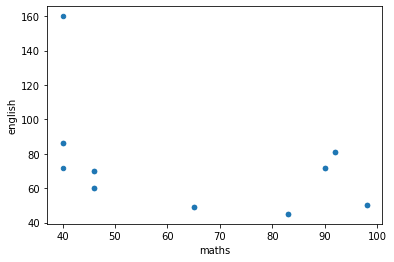

In [47]:
df3.plot.scatter(x='maths', y='english')

#### Box Plots

Box Plot is the visual representation of groups of numerical data through their quartiles.
* Boxplot summarizes a sample data using 25th, 50th and 75th percentiles.
* It captures the summary of the data efficiently with a simple box and whiskers.
* It allows us to compare easily across groups. 
* It is commonly used to detect the outlier in data set. 


A box plot consist of 5 things.
* Minimum
* First Quartile or 25%
* Median (Second Quartile) or 50%
* Third Quartile or 75%
* Maximum

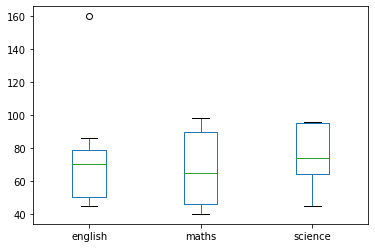

In [48]:
df3.plot.box()

Cap outliers' value.

In [49]:
df3[ df3['english']>100 ]
df3['english'][ df3['english']>100 ] = 60

<ipython-input-49-1aa96bf40baa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['english'][ df3['english']>100 ] = 60


### Duplicate Values

Reset index of `df3` such that it uses RangeIndex.

In [50]:
df3.reset_index(inplace=True)
df3.head()

,name,english,maths,science,eng_pass,maths_pass,maths_grade
0,Aaron,70,46,47,pass,failed,D
1,Adrian,72,40,95,pass,failed,D
2,Alby,49,65,64,failed,pass,C
3,Abner,86,40,96,pass,failed,D
4,Benett,50,98,69,pass,pass,A


Duplicate rows of index `[1, 3, 5]`.

In [51]:
df4 = pd.concat([df3, df3.iloc[[1,3,5],:]])
df4[ df4.duplicated() ] 

,name,english,maths,science,eng_pass,maths_pass,maths_grade
1,Adrian,72,40,95,pass,failed,D
3,Abner,86,40,96,pass,failed,D
5,Brion,81,92,95,pass,pass,A


Drop duplicates in dataframe directly.

In [52]:
df4.drop_duplicates(inplace=True)
df4.duplicated().any()

False

### Type Conversion

Some marks columns contains null values. In Pandas, only `float` and `object` types can contain null values.

For demonstration purpose, convert `math`, `english`, `science` columns to string format.

In [53]:
df4['maths'] = df4['maths'].apply(str)
df4['english'] = df4['english'].apply(str)
df4['science'] = df4['science'].apply(str)
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 0 to 17
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         18 non-null     object
 1   english      18 non-null     object
 2   maths        18 non-null     object
 3   science      18 non-null     object
 4   eng_pass     18 non-null     object
 5   maths_pass   18 non-null     object
 6   maths_grade  18 non-null     object
dtypes: object(7)
memory usage: 1.1+ KB


Use `DataFrame.astype()` to convert `english` and `maths` columns to **float** type.

In [54]:
df3[['english','maths']] = df3[['english','maths']].astype(float)

Use `pandas.to_numeric()` to convert `science` column to numeric type.

In [55]:
df3['science'] = pd.to_numeric(df3['science'], errors='coerce')

In [56]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         18 non-null     object 
 1   english      18 non-null     float64
 2   maths        18 non-null     float64
 3   science      18 non-null     int64  
 4   eng_pass     18 non-null     object 
 5   maths_pass   18 non-null     object 
 6   maths_grade  18 non-null     object 
dtypes: float64(2), int64(1), object(4)
memory usage: 1.1+ KB
